In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [300]:
df_2020 = pd.read_csv("EtsySoldOrderItems2020.csv")
df_2021 = pd.read_csv("EtsySoldOrderItems2021.csv")
df_2022 = pd.read_csv("EtsySoldOrderItems2022.csv")

In [301]:
df = pd.concat([df_2020, df_2021, df_2022])

In [302]:
df.drop(columns=['Buyer','Coupon Details','Shipping Discount','Order Shipping',\
                      'Order Sales Tax','Item Total', 'Currency','Transaction ID', 'Listing ID',\
                      'Date Paid', 'Date Shipped','Ship Name', 'Ship Address1', 'Ship Address2',\
                      'Ship Zipcode', 'Variations','Order Type', 'Listings Type',\
                      'Payment Type', 'InPerson Discount','InPerson Location', 'VAT Paid by Buyer',\
                      'SKU','Ship City','Ship State',"Item Name","Coupon Code","Ship Country",\
                "Order ID"],inplace = True)

In [303]:
df.head(2)

,Sale Date,Quantity,Price,Discount Amount
0,12/31/20,1,44.67,11.17
1,12/31/20,1,52.00,13.00


In [304]:
def map_years(dataframe, years, days, sale_date):
    dataframe[years] = ""
    dataframe[days] = ""
    for i in dataframe[sale_date]:
        date = datetime.datetime.strptime(i, "%m/%d/%y")
        year = date.year
        day_of_year = date.strftime("%j")
        dataframe.loc[dataframe[sale_date] == i, years] = year
        dataframe.loc[dataframe[sale_date] == i, days] = int(day_of_year)
    return dataframe

In [305]:
df = map_years(df,"Year","Day","Sale Date")

In [306]:
df.head(2)

,Sale Date,Quantity,Price,Discount Amount,Year,Day
0,12/31/20,1,44.67,11.17,2020,366
1,12/31/20,1,52.00,13.00,2020,366


In [307]:
x = pd.DataFrame(df.groupby(["Year"]).sum())

In [308]:
x["Total Profit"] = x["Price"] - x["Discount Amount"]

In [309]:
x.head()

,Quantity,Price,Discount Amount,Total Profit
Year,,,,
2020,706,42233.51,8976.09,33257.42
2021,995,70220.94,17329.83,52891.11
2022,597,49463.54,13381.96,36081.58


In [310]:
x = x.reset_index()

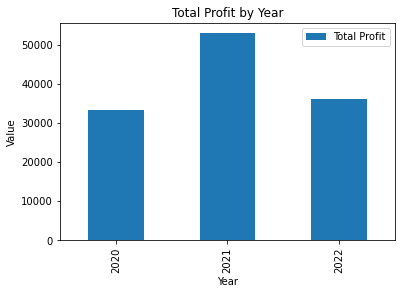

In [311]:
x.plot(kind="bar", x="Year", y=["Total Profit"])
plt.title("Total Profit by Year")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

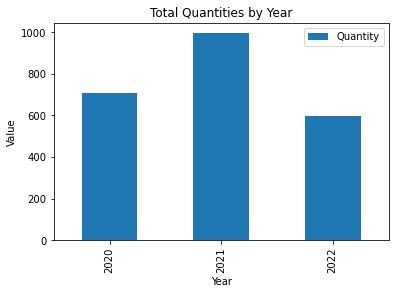

In [312]:
x.plot(kind="bar", x="Year", y=["Quantity"])
plt.title("Total Quantities by Year")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

In [313]:
# Group the data by Year and Day
grouped = df.groupby(['Year', 'Day'])

# Calculate the daily order quantities for each year
daily_quantities = grouped['Quantity'].sum()

# Reset the index to make Year and Day regular columns
daily_quantities = daily_quantities.reset_index()


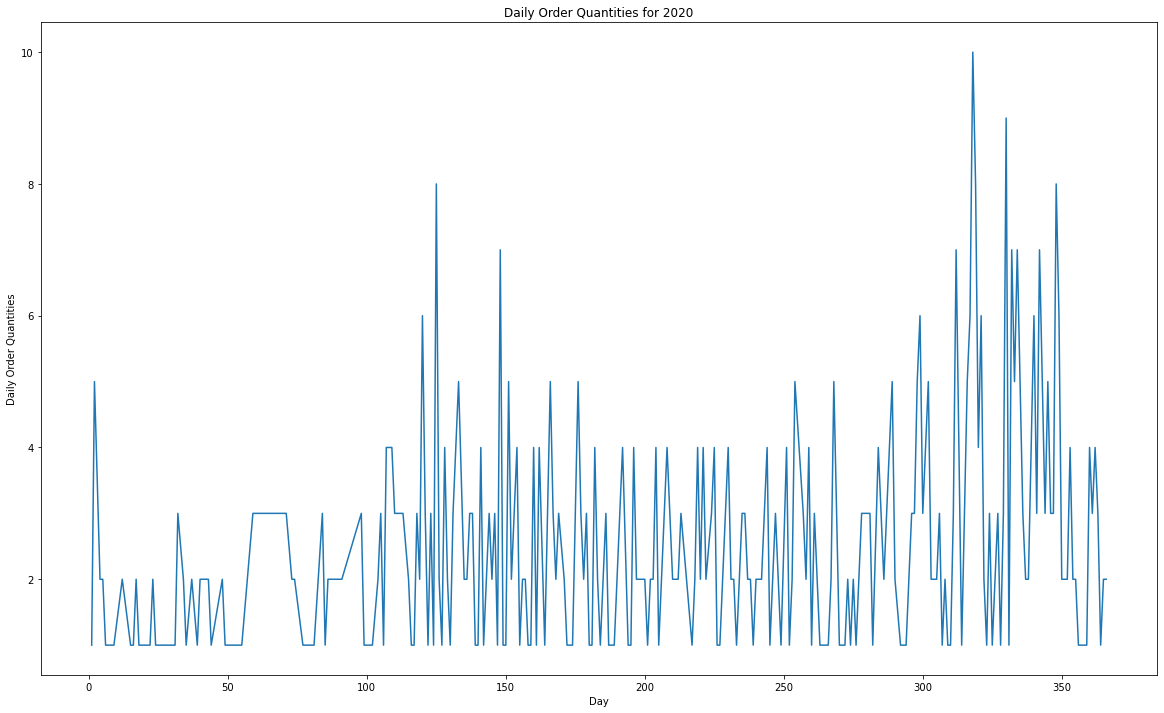

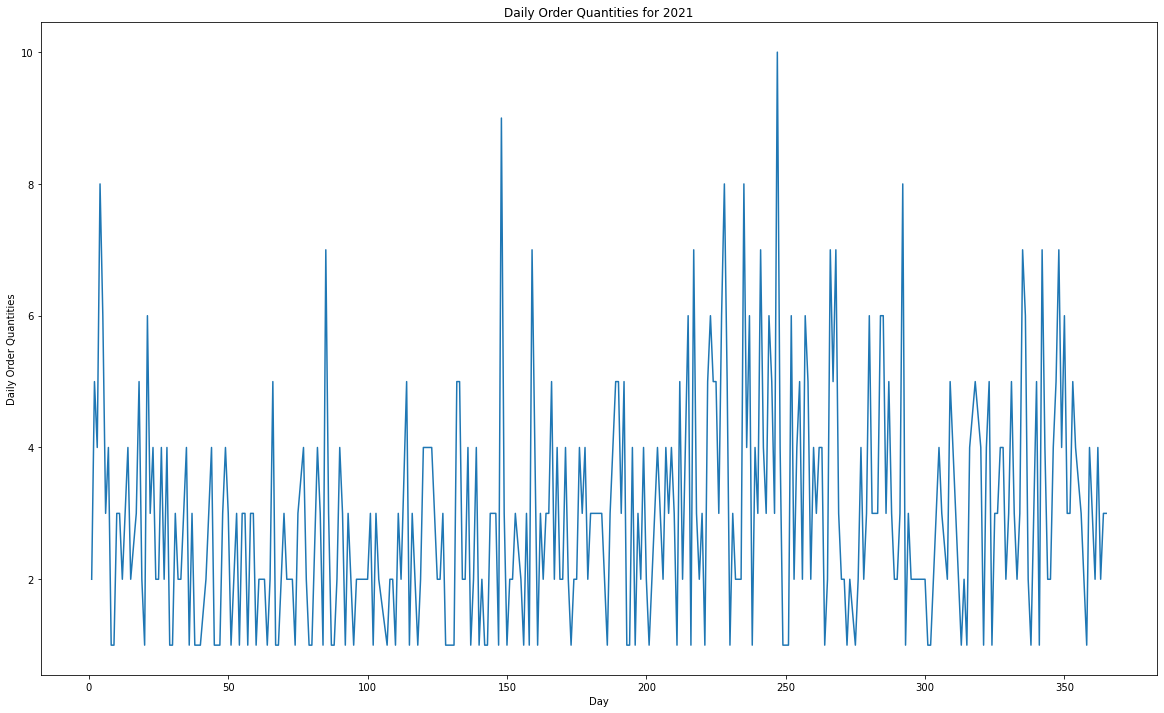

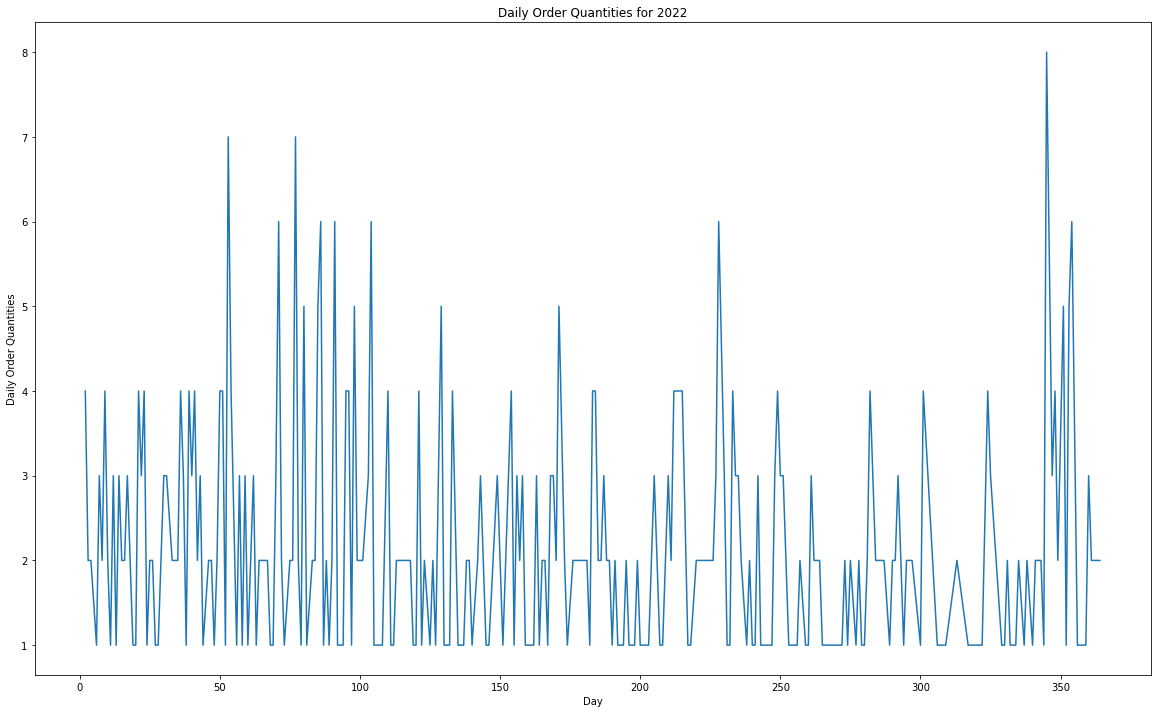

In [314]:
for year in daily_quantities['Year'].unique():
    plt.figure(figsize=(20, 12))  # Set the figure size to 10 inches wide by 6 inches tall
    plt.plot(daily_quantities.loc[daily_quantities['Year'] == year, 'Day'],
             daily_quantities.loc[daily_quantities['Year'] == year, 'Quantity'])
    plt.xlabel('Day')
    plt.ylabel('Daily Order Quantities')
    plt.title(f'Daily Order Quantities for {year}')
    plt.show()